In [1]:
import numpy as np
import math
from PIL import Image
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
def calc_spline(a,f1,f2):
    a=np.sort(a,axis=0)
    a=np.array(a)
    m=np.zeros(((len(a)-1)*4,(len(a)-1)*4))
    y=np.zeros((((len(a)-1)*4),1))
    i=0
    c=0
    while i<((len(a)-1)*4):
        cx=a[c][0]
        cy=a[c][1]
        m[i,i]=cx**3
        m[i][i+1]=cx**2
        m[i][i+2]=cx
        m[i][i+3]=1
        y[i][0]=cy
        cx=a[c+1][0]
        cy=a[c+1][1]
        m[i+1][i]=cx**3
        m[i+1][i+1]=cx**2
        m[i+1][i+2]=cx
        m[i+1][i+3]=1
        y[i+1][0]=cy
        i=i+4
        c=c+1
    m[2,(len(a)-1)*4-4]=6*a[len(a)-1][0]
    m[2,(len(a)-1)*4-3]=2
    m[2,2]=0
    m[3,0]=6*a[0][0]
    m[3,1]=2
    y[2,0]=f2
    y[3,0]=f1
    i=6
    c=1
    while i<((len(a)-1)*4):
        cx=a[c][0]
        m[i,i-2]=-3*(cx**2)
        m[i,i-1]=-2*cx
        m[i,i]=-1
        m[i,i-6]=3*(cx**2)
        m[i,i-5]=2*cx
        m[i,i-4]=1
        m[i+1,i-2]=-6*cx
        m[i+1,i-1]=-2
        m[i+1,i-6]=6*cx
        m[i+1,i-5]=2
        i=i+4
        c=c+1
    curve=np.linalg.inv(m)
    curve= np.dot(curve,y)
    fx=[]
    # f= lambda x: (9*(curve[i][0]**2)*x**4 +(4*(curve[i+1][0]**2)+6*curve[i][0]*curve[i+1][0])*x**2 +12*curve[i][0]*curve[i+1][0]*x**3 +4*curve[i+1][0]*curve[i+2][0]*x+ curve[i+2][0]**2)**(0.5)
    f= lambda x: abs(0.25*curve[i][0]*x**4+ (1/3)*curve[i+1][0]*x**3 +0.5*curve[i+2][0]*x**2 +curve[i+3][0]*x)
    cost=0
    st_line_area=0
    i=0
    c=0
    while i<(len(a)*4) and c<len(a)-1:
        x=np.linspace(a[c][0],a[c+1][0],100)
        for j in range(len(x)):
            fx.append((x[j]**3)*curve[i][0] +(x[j]**2)*curve[i+1][0]+x[j]*curve[i+2][0]+curve[i+3][0])

        cost_int,error=scipy.integrate.quad(f, a[c][0], a[c+1][0])
    #     print (cost_int)
        cost=cost +cost_int
        st_line_area=st_line_area+ 0.5*abs((a[c][0]-a[c+1][0])*(a[c][1]+a[c+1][1]))
        i=i+4
        c=c+1
        plt.plot(x,fx)
        plt.scatter(a[:,0],a[:,1])
        plt.grid()
#         plt.axvline()
#         plt.axhline()
        fx=[]
        
    cost=abs(cost-st_line_area)
    return cost

In [3]:
def calc_spline_img_plot(a,f1,f2,img):
    a=np.sort(a,axis=0)
    a=np.array(a)
    m=np.zeros(((len(a)-1)*4,(len(a)-1)*4))
    y=np.zeros((((len(a)-1)*4),1))
    i=0
    c=0
    while i<((len(a)-1)*4):
        cx=a[c][0]
        cy=a[c][1]
        m[i,i]=cx**3
        m[i][i+1]=cx**2
        m[i][i+2]=cx
        m[i][i+3]=1
        y[i][0]=cy
        cx=a[c+1][0]
        cy=a[c+1][1]
        m[i+1][i]=cx**3
        m[i+1][i+1]=cx**2
        m[i+1][i+2]=cx
        m[i+1][i+3]=1
        y[i+1][0]=cy
        i=i+4
        c=c+1
    m[2,(len(a)-1)*4-4]=6*a[len(a)-1][0]
    m[2,(len(a)-1)*4-3]=2
    m[2,2]=0
    m[3,0]=6*a[0][0]
    m[3,1]=2
    y[2,0]=f2
    y[3,0]=f1
    i=6
    c=1
    while i<((len(a)-1)*4):
        cx=a[c][0]
        m[i,i-2]=-3*(cx**2)
        m[i,i-1]=-2*cx
        m[i,i]=-1
        m[i,i-6]=3*(cx**2)
        m[i,i-5]=2*cx
        m[i,i-4]=1
        m[i+1,i-2]=-6*cx
        m[i+1,i-1]=-2
        m[i+1,i-6]=6*cx
        m[i+1,i-5]=2
        i=i+4
        c=c+1
    curve=np.linalg.inv(m)
    curve= np.dot(curve,y)
    
    fx=[]
    # f= lambda x: (9*(curve[i][0]**2)*x**4 +(4*(curve[i+1][0]**2)+6*curve[i][0]*curve[i+1][0])*x**2 +12*curve[i][0]*curve[i+1][0]*x**3 +4*curve[i+1][0]*curve[i+2][0]*x+ curve[i+2][0]**2)**(0.5)
    f= lambda x: abs(0.25*curve[i][0]*x**4+ (1/3)*curve[i+1][0]*x**3 +0.5*curve[i+2][0]*x**2 +curve[i+3][0]*x)
    cost=0
    st_line_area=0
    i=0
    c=0
    while i<(len(a)*4) and c<len(a)-1:
        x=np.linspace(a[c][0],a[c+1][0],100)
        for j in range(len(x)):
            fx.append((x[j]**3)*curve[i][0] +(x[j]**2)*curve[i+1][0]+x[j]*curve[i+2][0]+curve[i+3][0])

        cost_int,error=scipy.integrate.quad(f, a[c][0], a[c+1][0])
        cost=cost +cost_int
        st_line_area=st_line_area+ 0.5*abs((a[c][0]-a[c+1][0])*(a[c][1]+a[c+1][1]))
        i=i+4
        c=c+1
        
        plt.plot(fx,x)
        plt.scatter(a[:,1],a[:,0])
        fx=[]
    plt.imshow(img)    
    cost=abs(cost-st_line_area)
    return cost

In [4]:
class Poly5:
    def __init__(self,data):
        self.x1,self.v1,self.a1,self.x2,self.v2,self.a2,self.t = data
        m=np.zeros((6,6))
        y=np.zeros((6,1))
        m[0][5]=1
        m[1]=[(self.t)**5,(self.t)**4,(self.t)**3,(self.t)**2,(self.t)**1,(self.t)**0]
        y[0][0]=self.x1
        y[1][0]=self.x2
        m[2][4]=1
        m[3]=[5*(self.t)**4,4*(self.t)**3,3*(self.t)**2,2*(self.t)**1,(self.t)**0,0]
        y[2][0]=self.v1
        y[3][0]=self.v2
        m[4][3]=2
        m[5]=[20*(self.t)**3,12*(self.t)**2,6*(self.t)**1,2,0,0]
        y[4][0]=self.a1
        y[5][0]=self.a2
        curve=np.linalg.inv(m)
        curve=np.dot(curve,y)
        self.e5,self.e4,self.e3,self.e2,self.e1,self.e0 = curve
    
    def f(self,x):
        return self.e5*(x**5)+self.e4*(x**4)+self.e3*(x**3)+self.e2*(x**2)+self.e1*x + self.e0    
    def der1(self,x):
        return 5*self.e5*(x**4)+4*self.e4*(x**3)+3*self.e3*(x**2)+2*self.e2*x+self.e1
    def der2(self,x):
        return 20*self.e5*(x**3)+12*self.e4*(x**2)+6*self.e3*x+2*self.e2
    def der3(self,x):
        return 60*self.e5*(x**2)+24*self.e4*x+6*self.e3
    def der4(self,x):
        return 120*self.e5*x+24*self.e4
    def der5(self,x):
        return 120*self.e5

In [5]:
def detector(im):
    im=im.convert('RGB')
    np_im=np.array(im)
    width,height = im.size

    wayp=[]
    obstacle=[]
    vehicle=[]

    for i in range(height):
        for j in range(width):
            a,b,c= np_im[i,j]
            if (a,b,c)==(255,0,0):
                wayp.append((i,j))
            elif (a,b,c)==(255,255,255):
                obstacle.append((i,j))
            elif (a,b,c)==(0,255,0):
                vehicle.append((i,j))


    wayp=np.array(wayp)
    vehicle=np.array(vehicle)
    obstacle=np.array(obstacle)

    centre_x=np.mean(vehicle[:,0])
    centre_x=math.ceil(centre_x)
    centre_y=np.mean(vehicle[:,1])
    centre_y=math.ceil(centre_y)
    rx=max(centre_x-np.min(vehicle[:,0]),np.max(vehicle[:,0])-centre_x)
    ry=max(centre_y-np.min(vehicle[:,1]),np.max(vehicle[:,1])-centre_y)
    radius=max(rx,ry)

    wayp = np.append(wayp, [(centre_x,centre_y)], axis = 0)
    return wayp,vehicle,radius,obstacle

94794372.86089233

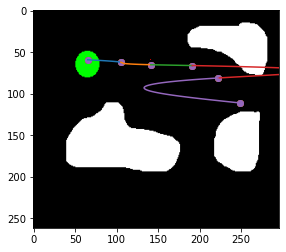

In [6]:
image=Image.open("sample4.png")
waypoints,vehicle,vehicle_radius,obstacles=detector(image)
# calc_spline(waypoints,1,100)
calc_spline_img_plot(waypoints,0,0,image)

53.89318790623918

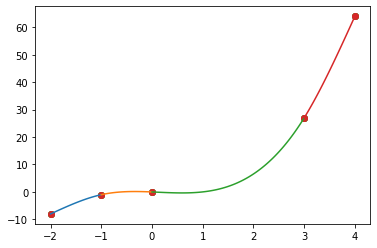

In [7]:
calc_spline([(-2,-8),(-1,-1),(4,64),(3,27),(0,0)],0,0)